# Project Goal:  Analyize Star Wars Survey
Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import chardet
import re


In [2]:
#star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

First row has all the correct answers

In [4]:
star_wars=star_wars[star_wars["RespondentID"].notnull()]

In [5]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
boolean = {'Yes': True, 'No': False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(boolean)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(boolean)

In [8]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].unique()


array([ True, False])

In [9]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].unique()

array([True, nan, False], dtype=object)

In [10]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6",
})

In [11]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [12]:
yes_nan = {"Star Wars: Episode I  The Phantom Menace": True,
           "Star Wars: Episode II  Attack of the Clones": True,           
           "Star Wars: Episode III  Revenge of the Sith": True,
            "Star Wars: Episode IV  A New Hope": True,
            "Star Wars: Episode V The Empire Strikes Back": True,
            "Star Wars: Episode VI Return of the Jedi": True,
              np.NaN: False}     
star_wars["seen_1"]=star_wars["seen_1"].map(yes_nan)
star_wars["seen_2"]=star_wars["seen_2"].map(yes_nan)
star_wars["seen_3"]=star_wars["seen_3"].map(yes_nan)
star_wars["seen_4"]=star_wars["seen_4"].map(yes_nan)
star_wars["seen_5"]=star_wars["seen_5"].map(yes_nan)
star_wars["seen_6"]=star_wars["seen_6"].map(yes_nan)


In [13]:
star_wars["seen_1"].unique()

array([ True, False])

In [14]:
star_wars["seen_2"].unique()

array([ True, False])

In [15]:
star_wars["seen_3"].unique()

array([ True, False])

In [16]:
star_wars["seen_4"].unique()

array([ True, False])

In [17]:
star_wars["seen_5"].unique()

array([ True, False])

In [18]:
star_wars["seen_6"].unique()

array([ True, False])

In [19]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [20]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6",
})

In [21]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
 

In [22]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<BarContainer object of 6 artists>

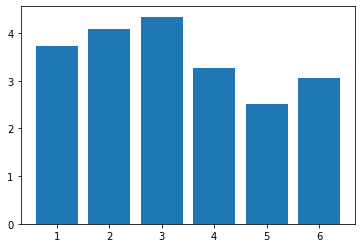

In [23]:
labels = ['1', '2', '3', '4', '5', '6']
plt.xticks(range(6), labels)
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean(), align="center")

### The movie - Star Wars: Episode V The Empire Strikes Back it most liked as aspected
The columns of movies seen and rated have been cleaned to be able to see who likes which movie the best.  The last 3 episodes were more liked then the first 3.  This could be from popularity of star wars over the years.  From all the Episode V was the best as aspected.  Before better analyizing thoughw e cannot assume this is the most like movie as it could be do to other variables such as it was the most watched movie, advertised better, etc.  

In [24]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

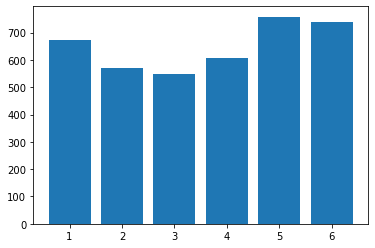

In [25]:
labels = ['1', '2', '3', '4', '5', '6']
plt.xticks(range(6), labels)
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum(), align='center')

#### I suspect the first movie had a higher count as it was a new movie.  People didn't like the movie so much so the watch amount went down.  Episode V was made to be an extra good movie, making the number rise, causing the following video to have a higher watch count hoping the following video will be just as good.  This follows in sync with the rating of the videos.  The first video was not liked so much. Episode IV was liked more and viewed more.

In [26]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [27]:
males[males.columns[3:9]].sum()


seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

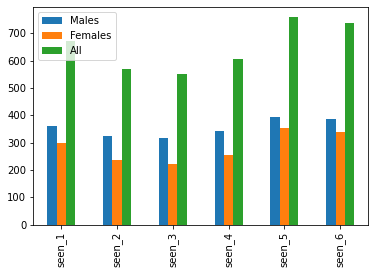

In [28]:
pd.concat({
    'Males': males[males.columns[3:9]].sum(), 
    'Females':females[females.columns[3:9]].sum(), 
    'All': star_wars[star_wars.columns[3:9]].sum()
}, axis=1).plot.bar()

In [ ]:
pd.concat({
    'Males': males[males.columns[3:9]].sum(), 
    'Females':females[females.columns[3:9]].sum(), 
    'All': star_wars[star_wars.columns[3:9]].sum()
}, axis=1).plot.bar()

##### This video is a Science Fiction movie which as suspected males would like want to watch more than females.

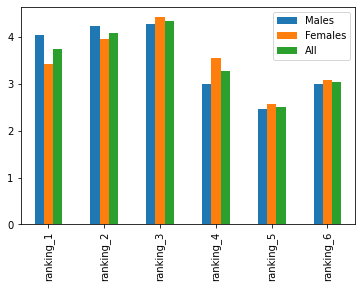

In [29]:
pd.concat({
    'Males': males[males.columns[9:15]].mean(), 
    'Females':females[females.columns[9:15]].mean(), 
    'All': star_wars[star_wars.columns[9:15]].mean()
}, axis=1).plot.bar()

##### The ranking of the movie was very similar for males and females.

In [30]:
film_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_film_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

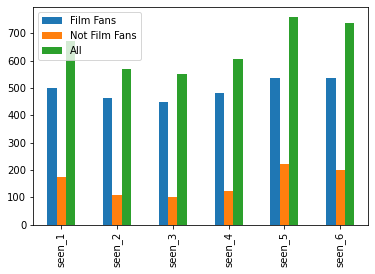

In [31]:
pd.concat({
    'Film Fans': film_fan[film_fan.columns[3:9]].sum(), 
    'Not Film Fans':not_film_fan[not_film_fan.columns[3:9]].sum(), 
    'All': star_wars[star_wars.columns[3:9]].sum()
}, axis=1).plot.bar()

##### As suspected Star War Film Fans would have a higher rate of watching the movies

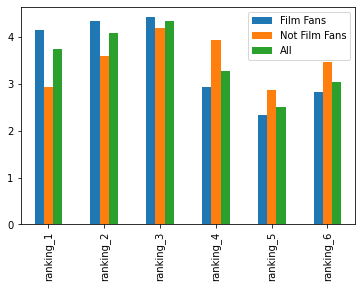

In [32]:
pd.concat({
    'Film Fans': film_fan[film_fan.columns[9:15]].mean(), 
    'Not Film Fans':not_film_fan[not_film_fan.columns[9:15]].mean(), 
    'All': star_wars[star_wars.columns[9:15]].mean()
}, axis=1).plot.bar()

##### Surprising, Star War film fans did not like the first 3 movies. The next 3 movies were much more enjoyed.  This did not affect the viewing rate.  It makes sense that there were more views in the last 3 episodes by non film fans since the film fans could have spread the word that it is worth watching.